In [104]:
import pandas as pd
import plotly.express as px
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 30)

### 26-01 
Load Accounts Payable Data file Accounts Payable

In [105]:
df_ap = pd.read_csv('Files/Accounts Payable.csv')

In [106]:
df_ap.head()

Supplier Number    Supplier Name Invoice Number  Invoice Date    Amount  \
0          ZT2505  My Fake Company     GJi^505715      20200409 93,789.36   
1          ZT2505  My Fake Company     Gy]p954229      20200611 16,207.35   
2          JH6327       Petty Cash     1DaQ134665      20201003 84,225.00   
3          JH6327       Petty Cash     hwp>107425      20201101 66,000.00   
4          ZT2505  My Fake Company     LoBe173553      20201127  5,144.10   

  Paid      Check  Pay Date Authorization  
0    X 367,218.00  20200409           DAR  
1    X 367,391.00  20200611            NW  
2    X 367,774.00  20201008          N AW  
3    X 367,875.00  20201101           DAR  
4  NaN        nan  20201127         D.A.R

In [107]:
df_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Supplier Number  999 non-null    object 
 1   Supplier Name    999 non-null    object 
 2   Invoice Number   999 non-null    object 
 3   Invoice Date     999 non-null    int64  
 4   Amount           999 non-null    float64
 5   Paid             975 non-null    object 
 6   Check            975 non-null    float64
 7   Pay Date         999 non-null    int64  
 8   Authorization    999 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 70.4+ KB


Filter for Supplier Number JH6327

In [108]:
df_ap[df_ap['Supplier Number'] == 'JH6327']

Supplier Number Supplier Name Invoice Number  Invoice Date     Amount Paid  \
2           JH6327    Petty Cash     1DaQ134665      20201003  84,225.00    X   
3           JH6327    Petty Cash     hwp>107425      20201101  66,000.00    X   
5           JH6327    Petty Cash     <Xhm496276      20200210  24,292.98    X   
7           JH6327    Petty Cash     v1x]239137      20200428   3,136.22    X   
9           JH6327    Petty Cash     w6Hv958151      20200915  84,225.00    X   
11          JH6327    Petty Cash     1Kph502899      20201019  84,225.00    X   
19          JH6327    Petty Cash     N8UM608657      20201119   3,282.28  NaN   
22          JH6327    Petty Cash     qTJY474429      20200626 213,450.16    X   

        Check  Pay Date Authorization  
2  367,774.00  20201008          N AW  
3  367,875.00  20201101           DAR  
5  367,046.00  20200212         N.A.W  
7  367,270.00  20200501            NW  
9  367,728.00  20200917         D.A.R  
11 367,849.00  20201022           DAR  
19        nan  20201120         N.A.W  
22 367,443.00  20200630           NAW

Convert Invoice Date and Pay Date to datetime

Hint:
Google:
date format YYYYMMDD pandas

this was one of the items in the search results and helped me resolve my issue

https://stackoverflow.com/questions/27506367/python-pandas-integer-yyyymmdd-to-datetime

In [109]:
df_ap['Invoice Date'] = pd.to_datetime(df_ap['Invoice Date'], format='%Y%m%d')
df_ap['Pay Date'] = pd.to_datetime(df_ap['Pay Date'], format='%Y%m%d')

In [110]:
df_ap.head(3)

Supplier Number    Supplier Name Invoice Number Invoice Date    Amount Paid  \
0          ZT2505  My Fake Company     GJi^505715   2020-04-09 93,789.36    X   
1          ZT2505  My Fake Company     Gy]p954229   2020-06-11 16,207.35    X   
2          JH6327       Petty Cash     1DaQ134665   2020-10-03 84,225.00    X   

       Check   Pay Date Authorization  
0 367,218.00 2020-04-09           DAR  
1 367,391.00 2020-06-11            NW  
2 367,774.00 2020-10-08          N AW

### 26b-01a
Verify Control Values are Accurate and Perform the Describe Command

The following items were provided as check figures for our AP dataset. Verify that they are accurate

| Fields   | Aggregation | Amount        |
|----------|-------------|---------------|
| Amount   | Sum         | 38,345,172.88 |
| Amount   | Count       | 999           |
| Amount   | Average     | 38,383.56     |
| Check    | Sum         | 358,300,079   |
| Check    | Min         | 367,001       |
| Check    | Max         | 367,996       |
| INV_DATE | Earliest    | 2020-01-04    |
| INV_DATE | Latest      | 2020-12-06    |
| PAY_DATE | Earliest    | 2020-01-12    |
| PAY_DATE | Latest      | 2020-12-29    |

In [111]:
print(df_ap['Amount'].sum())
print(df_ap['Amount'].count())
print(round(df_ap['Amount'].mean(), 2))
print(df_ap['Check'].sum())
print(df_ap['Check'].min())
print(df_ap['Check'].max())
print(df_ap['Invoice Date'].min())
print(df_ap['Invoice Date'].max())
print(df_ap['Pay Date'].min())
print(df_ap['Pay Date'].max())

38344144.28
999
38382.53
358300079.0
367001.0
367996.0
2020-01-04 00:00:00
2020-12-06 00:00:00
2020-01-12 00:00:00
2020-12-29 00:00:00


Use the describe function to get a summary of statistics include non-numeric fields

In [112]:
df_ap.describe(include='all')

<ipython-input-112-a9f35b08ad25>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

<ipython-input-112-a9f35b08ad25>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



Supplier Number  Supplier Name Invoice Number         Invoice Date  \
count              999            999            999                  999   
unique              48             49            995                  233   
top             QE4715  AZ Telephones              0  2020-07-03 00:00:00   
freq                52             52              5                   15   
first              NaN            NaN            NaN  2020-01-04 00:00:00   
last               NaN            NaN            NaN  2020-12-06 00:00:00   
mean               NaN            NaN            NaN                  NaN   
std                NaN            NaN            NaN                  NaN   
min                NaN            NaN            NaN                  NaN   
25%                NaN            NaN            NaN                  NaN   
50%                NaN            NaN            NaN                  NaN   
75%                NaN            NaN            NaN                  NaN   
max                NaN            NaN            NaN                  NaN   

           Amount Paid      Check             Pay Date Authorization  
count      999.00  975     975.00                  999           999  
unique        nan    1        nan                  236            24  
top           nan    X        nan  2020-07-30 00:00:00           NAW  
freq          nan  975        nan                   22           296  
first         nan  NaN        nan  2020-01-12 00:00:00           NaN  
last          nan  NaN        nan  2020-12-29 00:00:00           NaN  
mean    38,382.53  NaN 367,487.26                  NaN           NaN  
std     32,797.60  NaN     281.58                  NaN           NaN  
min          0.00  NaN 367,001.00                  NaN           NaN  
25%      9,771.18  NaN 367,243.50                  NaN           NaN  
50%     29,153.99  NaN 367,487.00                  NaN           NaN  
75%     62,313.35  NaN 367,730.50                  NaN           NaN  
max    217,286.15  NaN 367,996.00                  NaN           NaN

### 26b-01b
Import the Authorization Supplier details "Vendor Master.csv"

In [113]:
df_xl = pd.read_csv('Files/Vendor Master.csv')
df_xl.head()

Supplier Number         Supplier Name        Street Address       State  \
0          PR9055  Satefy Equipment Inc    45347 CLUBHOUSE DR  CALIFORNIA   
1          PR6166    Telling Ya Sponges   454 ROCKERFELLER RD  CALIFORNIA   
2          EY8784       Friction Finder          1831 41ST AV  CALIFORNIA   
3          EY0705          David's Cash    24518 Mission Blvd  CALIFORNIA   
4          BO8774         Falling Signs  10114 SECRET ROSE ST  CALIFORNIA   

          City  Zip Code  Prior Year Amount  
0     TEMECULA 92,592.00         539,426.30  
1  BERRY CREEK 95,916.00         490,884.90  
2      OAKLAND 94,601.00         625,359.79  
3      Hayward 94,544.00       1,040,896.21  
4  BAKERSFIELD 93,311.00         438,643.80

In [114]:
df_xl[df_xl['Supplier Number'] == 'PR9055']

Supplier Number         Supplier Name      Street Address       State  \
0          PR9055  Satefy Equipment Inc  45347 CLUBHOUSE DR  CALIFORNIA   

       City  Zip Code  Prior Year Amount  
0  TEMECULA 92,592.00         539,426.30

### 26b-01c 
Compute totals to verify all data was imported correctly

Prior Year Amount should agree to $33,376,004.84 , 48 rows and 7 columns

In [115]:
df_xl.shape

(47, 7)

In [116]:
df_xl['Prior Year Amount'].sum()

33376004.84

In [117]:
df_xl.describe()

Zip Code  Prior Year Amount
count     46.00              47.00
mean  94,260.15         710,127.76
std    1,045.31         300,391.26
min   90,745.00               0.00
25%   93,311.50         516,673.29
50%   94,550.50         684,868.22
75%   94,610.00         899,211.16
max   95,954.00       1,569,490.27

The describe function returned scientific notation, reformat it to comma seperate two decimal places

In [118]:
pd.options.display.float_format = '{:,.2f}'.format
df_xl.describe(include='all')

Supplier Number Supplier Name   Street Address       State     City  \
count               47            47               47          47       47   
unique              47            47               47           1       23   
top             PR9055    Bazo Bucks  2033 LARCUS AVE  CALIFORNIA  OAKLAND   
freq                 1             1                1          47        7   
mean               NaN           NaN              NaN         NaN      NaN   
std                NaN           NaN              NaN         NaN      NaN   
min                NaN           NaN              NaN         NaN      NaN   
25%                NaN           NaN              NaN         NaN      NaN   
50%                NaN           NaN              NaN         NaN      NaN   
75%                NaN           NaN              NaN         NaN      NaN   
max                NaN           NaN              NaN         NaN      NaN   

        Zip Code  Prior Year Amount  
count      46.00              47.00  
unique       nan                nan  
top          nan                nan  
freq         nan                nan  
mean   94,260.15         710,127.76  
std     1,045.31         300,391.26  
min    90,745.00               0.00  
25%    93,311.50         516,673.29  
50%    94,550.50         684,868.22  
75%    94,610.00         899,211.16  
max    95,954.00       1,569,490.27

In [119]:
df_xl.head()

Supplier Number         Supplier Name        Street Address       State  \
0          PR9055  Satefy Equipment Inc    45347 CLUBHOUSE DR  CALIFORNIA   
1          PR6166    Telling Ya Sponges   454 ROCKERFELLER RD  CALIFORNIA   
2          EY8784       Friction Finder          1831 41ST AV  CALIFORNIA   
3          EY0705          David's Cash    24518 Mission Blvd  CALIFORNIA   
4          BO8774         Falling Signs  10114 SECRET ROSE ST  CALIFORNIA   

          City  Zip Code  Prior Year Amount  
0     TEMECULA 92,592.00         539,426.30  
1  BERRY CREEK 95,916.00         490,884.90  
2      OAKLAND 94,601.00         625,359.79  
3      Hayward 94,544.00       1,040,896.21  
4  BAKERSFIELD 93,311.00         438,643.80

### 26b-02
Analyze the profile of the number and value of payments for unusual or high value amounts

### 26b-02a
#### Create bins for the amount column

| Lower Bin | Upper Bin |
|-----------|-----------|
| 0         | 10,000    |
| 10,001    | 20,000    |
| 20,001    | 30,000    |
| 30,001    | 40,000    |
| 40,001    | 50,000    |
| 50,001    | 60,000    |
| 60,001    | 70,000    |
| 70,001    | 80,000    |
| 80,001    | 90,000    |
| 90,001    | 100,000   |
| 100,001   | 150,000   |
| 150,001   | 250,000   |

In [120]:
df_ap['bins'] = pd.cut(df_ap['Amount'], bins = [-1, 10000, 
                    20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000,
                    100000, 150000, 250000], 
                   labels=['0-10,000','10,001-20,000', '20,001-30,000'
                           ,'30,001-40,000', '40,001-50,000', '50,001-60,000',
                          '60,001-70,000', '70,001-80,000', '80,001-90,000',
                          '90,001-100,000', '100,001-150,000', '150,001-250,000'],
                  include_lowest=False, right=True)

### 26b-02b
group the bins by the sum of amount

In [121]:
print('\nTotal')
df_ap.groupby('bins') ['Amount'].agg(['sum', 'count'])


Total


sum  count
bins                               
0-10,000        1,106,592.55    257
10,001-20,000   2,011,123.56    136
20,001-30,000   2,751,688.70    112
30,001-40,000   2,859,975.57     83
40,001-50,000   3,309,543.55     74
50,001-60,000   4,036,066.29     73
60,001-70,000   3,889,375.11     60
70,001-80,000   3,738,110.13     50
80,001-90,000   6,590,236.37     77
90,001-100,000  3,044,485.15     32
100,001-150,000 4,576,210.99     43
150,001-250,000   430,736.31      2

Calculate the percentage of each bin to the total amount

In [122]:
print("\nPercentage")
df_ap.groupby('bins') [['Amount']].sum() / df_ap.groupby('bins') [['Amount']].sum().sum()


Percentage


Amount
bins                   
0-10,000           0.03
10,001-20,000      0.05
20,001-30,000      0.07
30,001-40,000      0.07
40,001-50,000      0.09
50,001-60,000      0.11
60,001-70,000      0.10
70,001-80,000      0.10
80,001-90,000      0.17
90,001-100,000     0.08
100,001-150,000    0.12
150,001-250,000    0.01

### 26b-02c 
Create a bar chart showing the count of items by bin

In [123]:
df_ap_gr = df_ap.groupby('bins')['Amount'].agg(['count'])
fig = px.bar(df_ap_gr, x=df_ap_gr.index, y='count')
fig.show()

Create a bar chart with the sum of amounts by bin

In [124]:
df_ap_gr = df_ap.groupby('bins')['Amount'].agg(['sum'])
fig = px.bar(df_ap_gr, x=df_ap_gr.index, y='sum')
fig.show()

### 26b-02d
Filter for bin "20,0001 - 30,000"

In [125]:
#Obtaining a unique list of values
df_ap.sort_values('bins').drop_duplicates(subset='bins')['bins']

998           0-10,000
341      10,001-20,000
536      20,001-30,000
797      30,001-40,000
745      40,001-50,000
731      50,001-60,000
771      60,001-70,000
991      70,001-80,000
958      80,001-90,000
995     90,001-100,000
703    100,001-150,000
22     150,001-250,000
Name: bins, dtype: category
Categories (12, object): ['0-10,000' < '10,001-20,000' < '20,001-30,000' < '30,001-40,000' ... '80,001-90,000' < '90,001-100,000' < '100,001-150,000' < '150,001-250,000']

In [126]:
df_ap[df_ap['bins'] == '20,001-30,000']

Supplier Number           Supplier Name Invoice Number Invoice Date  \
5            JH6327              Petty Cash     <Xhm496276   2020-02-10   
8            ZT2505         My Fake Company     sA/9367744   2020-05-22   
26           IS8962        Melissa Findberg     oD]/269936   2020-01-11   
35           PR6166      Telling Ya Sponges     \sZf852615   2020-01-29   
45           TQ4593               Play Ball     sMnQ983714   2020-02-23   
..              ...                     ...            ...          ...   
968          QE4715           AZ Telephones     t\Cy739073   2020-10-16   
972          XF6148              Bazo Bucks     RG_6359939   2020-10-20   
975          EV7305  Michele's Lawn Service     2U4T699456   2020-10-23   
984          IW4469             Oh Where Go     K;WX745678   2020-11-08   
986          PR6166      Telling Ya Sponges     zLb2285323   2020-11-13   

       Amount Paid      Check   Pay Date Authorization           bins  
5   24,292.98    X 367,046.00 2020-02-12         N.A.W  20,001-30,000  
8   28,346.99    X 367,341.00 2020-05-23            NW  20,001-30,000  
26  29,580.16    X 367,013.00 2020-02-05           NAW  20,001-30,000  
35  25,695.34    X 367,103.00 2020-02-28           N.A  20,001-30,000  
45  21,216.51    X 367,163.00 2020-03-20            MA  20,001-30,000  
..        ...  ...        ...        ...           ...            ...  
968 25,997.65    X 367,906.00 2020-11-14           NAW  20,001-30,000  
972 26,026.15    X 367,928.00 2020-11-20           JTE  20,001-30,000  
975 27,911.86    X 367,938.00 2020-11-22            MA  20,001-30,000  
984 22,033.51  NaN        nan 2020-12-08           JTE  20,001-30,000  
986 22,254.36  NaN        nan 2020-12-13          N.W.  20,001-30,000  

[112 rows x 10 columns]

### 26b-03 
Analysis unusual payments further

### 26b-03a 
Filter for transaction in bin “70,001-80,000” or greater than 100,000

In [127]:
df_ap[(df_ap['bins'] == '70,001-80,000') | (df_ap['Amount'] > 100000)]

Supplier Number    Supplier Name Invoice Number Invoice Date     Amount  \
14           ZT2505  My Fake Company     Cw>h707392   2020-03-19 116,918.71   
22           JH6327       Petty Cash     qTJY474429   2020-06-26 213,450.16   
25           YB1642  Jessica Johnson     2IP]982084   2020-01-10  72,537.39   
28           DQ1027     Felon You Up     @eA[926845   2020-01-17 107,994.97   
33           EU3308            Yahoo     <Qqg218338   2020-02-02 109,353.70   
..              ...              ...            ...          ...        ...   
928          CJ3092    Rebecca Smith     uBli488414   2020-07-27 104,957.81   
962          IW4469      Oh Where Go     3MPP203142   2020-09-22 102,996.67   
977          BO8774    Falling Signs     E6]m896928   2020-10-26  79,628.99   
981          ZI0783   Art's Ceramics     B?^j628088   2020-11-01 101,392.47   
991          PB1810     Flash Jamada     u_6Y894643   2020-12-06  74,392.45   

    Paid      Check   Pay Date Authorization             bins  
14     X 367,166.00 2020-03-25          N.AW  100,001-150,000  
22     X 367,443.00 2020-06-30           NAW  150,001-250,000  
25     X 367,007.00 2020-02-03         N.A.W    70,001-80,000  
28     X 367,037.00 2020-02-12           DAR  100,001-150,000  
33     X 367,092.00 2020-02-26           NAW  100,001-150,000  
..   ...        ...        ...           ...              ...  
928    X 367,663.00 2020-08-25            NW  100,001-150,000  
962    X 367,840.00 2020-10-23            MA  100,001-150,000  
977    X 367,942.00 2020-11-26           JRR    70,001-80,000  
981    X 367,958.00 2020-12-01            DR  100,001-150,000  
991  NaN        nan 2020-12-06           JTE    70,001-80,000  

[95 rows x 10 columns]

What is the total of the amount of the filter

In [128]:
df_ap[(df_ap['bins'] == '70,001-80,000') | (df_ap['Amount'] > 100000)]['Amount'].sum()

8745057.43

What is the number of rows of the filtered values

In [129]:
df_ap[(df_ap['Amount'] >= 70000) & (df_ap['Amount'] < 80000)| (df_ap['Amount']>100000)].shape

(95, 10)

### 26b-03a 
It was noted that several suppliers contained cash in the payee name. These may be a higher risk of fraud. Filter where cash is contained in the payee name field

In [130]:
df_ap[df_ap['Supplier Name'].str.contains('cash', case=False)]

Supplier Number Supplier Name Invoice Number Invoice Date    Amount Paid  \
2            JH6327    Petty Cash     1DaQ134665   2020-10-03 84,225.00    X   
3            JH6327    Petty Cash     hwp>107425   2020-11-01 66,000.00    X   
5            JH6327    Petty Cash     <Xhm496276   2020-02-10 24,292.98    X   
6            EY0705  David's Cash     ?Jm:528251   2020-03-06  7,010.60    X   
7            JH6327    Petty Cash     v1x]239137   2020-04-28  3,136.22    X   
..              ...           ...            ...          ...       ...  ...   
668          EY0705  David's Cash     eD@r693691   2020-01-28  3,320.94    X   
741          EY0705  David's Cash     FoRQ778477   2020-06-30  7,041.42    X   
765          EY0705  David's Cash     7e@3964552   2020-07-31  4,064.11    X   
844          EY0705  David's Cash     1x80301248   2020-02-09 62,801.72    X   
890          EY0705  David's Cash     7sUR306291   2020-05-22 85,595.16    X   

         Check   Pay Date Authorization           bins  
2   367,774.00 2020-10-08          N AW  80,001-90,000  
3   367,875.00 2020-11-01           DAR  60,001-70,000  
5   367,046.00 2020-02-12         N.A.W  20,001-30,000  
6   367,117.00 2020-03-06           NAW       0-10,000  
7   367,270.00 2020-05-01            NW       0-10,000  
..         ...        ...           ...            ...  
668 367,093.00 2020-02-26         N.A.W       0-10,000  
741 367,546.00 2020-07-30            NW       0-10,000  
765 367,673.00 2020-08-28            MA       0-10,000  
844 367,138.00 2020-03-10         N.A.W  60,001-70,000  
890 367,414.00 2020-06-20           NAW  80,001-90,000  

[35 rows x 10 columns]

In [131]:
df_ap[df_ap['Supplier Name'].str.contains('cash', case=False)] ['Amount'].sum()

1589938.22

In [132]:
df_ap[df_ap['Supplier Name'].str.contains('cash', case=False)] ['Amount'].shape

(35,)

### 26b-03b
Find amounts end in ,000

Hint: use the .mod command

In [133]:
df_ap[df_ap['Amount'].mod(1000) == 0]

Supplier Number        Supplier Name Invoice Number Invoice Date  \
3            JH6327           Petty Cash     hwp>107425   2020-11-01   
43           NC3691       Hunter Backman     _SEL204430   2020-02-19   
100          HQ2320          Blackline R     lJis102815   2020-06-22   
222          XN4009  Taste of the Dragon     M8Pk995614   2020-03-10   
582          AW4588    Justin Timberlake     8uUa751621   2020-06-29   

        Amount Paid      Check   Pay Date Authorization             bins  
3    66,000.00    X 367,875.00 2020-11-01           DAR    60,001-70,000  
43  108,000.00    X 367,149.00 2020-03-15           NAW  100,001-150,000  
100   7,000.00    X 367,501.00 2020-07-17           JRR         0-10,000  
222       0.00    X 367,211.00 2020-04-06           NAW         0-10,000  
582       0.00    X 367,527.00 2020-07-27         N.A.W         0-10,000

In [134]:
df_ap[df_ap['Amount'].mod(1000) == 0]['Amount'].sum()

181000.0

### 26b-03c
Finding all transaction authorized by DAR

Hint: use the .unique command on 'Authorization' to see if there are any variations you should consider

In [135]:
df_ap['Authorization'].unique()

array(['DAR', 'NW', 'N AW', 'D.A.R', 'N.A.W', 'NAW', 'N.AW', 'MA', 'JRR',
       'N.A', 'MAR', 'JTE', 'NA W', 'CAB', 'P.J.M.', 'N A W', 'N-A-W',
       'N A', 'N.W.', 'JTD', 'JT E', 'DR', 'J-T- E', 'N A.W'],
      dtype=object)

In [136]:
df_ap[df_ap['Authorization'].str.strip().str.upper().str.replace('.','') == 'DAR'] ['Amount'].sum()

2784336.5700000003

In [137]:
dar_auth = df_ap[df_ap['Authorization'].str.strip().str.upper().str.replace('.','') == 'DAR']
dar_auth

Supplier Number    Supplier Name Invoice Number Invoice Date    Amount  \
0            ZT2505  My Fake Company     GJi^505715   2020-04-09 93,789.36   
3            JH6327       Petty Cash     hwp>107425   2020-11-01 66,000.00   
4            ZT2505  My Fake Company     LoBe173553   2020-11-27  5,144.10   
9            JH6327       Petty Cash     w6Hv958151   2020-09-15 84,225.00   
11           JH6327       Petty Cash     1Kph502899   2020-10-19 84,225.00   
..              ...              ...            ...          ...       ...   
902          OS6970  Telephone Fixer     uJbY464511   2020-06-09 24,114.29   
903          HQ2320      Blackline R     [IO/731464   2020-06-11 66,631.52   
906          CJ3092    Rebecca Smith              0   2020-06-19 55,171.04   
934          OJ8722     Mindy Castle     k<9B375991   2020-07-30 37,991.61   
946          PB1810     Flash Jamada     iUm^762527   2020-09-29 81,948.16   

    Paid      Check   Pay Date Authorization            bins  
0      X 367,218.00 2020-04-09           DAR  90,001-100,000  
3      X 367,875.00 2020-11-01           DAR   60,001-70,000  
4    NaN        nan 2020-11-27         D.A.R        0-10,000  
9      X 367,728.00 2020-09-17         D.A.R   80,001-90,000  
11     X 367,849.00 2020-10-22           DAR   80,001-90,000  
..   ...        ...        ...           ...             ...  
902    X 367,481.00 2020-07-10         D.A.R   20,001-30,000  
903    X 367,483.00 2020-07-10         D.A.R   60,001-70,000  
906    X 367,506.00 2020-07-20         D.A.R   50,001-60,000  
934    X 367,686.00 2020-08-28           DAR   30,001-40,000  
946    X 367,754.00 2020-10-30           DAR   80,001-90,000  

[71 rows x 10 columns]

### 26b-03d
Filter for payments made on Sunday

In [138]:
df_ap['Pay_Weekday'] = df_ap['Pay Date'].dt.day_name()

In [139]:
df_ap[df_ap['Pay_Weekday'] == 'Sunday']

Supplier Number           Supplier Name Invoice Number Invoice Date  \
3            JH6327              Petty Cash     hwp>107425   2020-11-01   
10           ZT2505         My Fake Company     1=Z;654653   2020-10-17   
27           EU3308                   Yahoo     v1<H629924   2020-01-14   
31           PE5259              Lawn Green     vx94174825   2020-01-17   
43           NC3691          Hunter Backman     _SEL204430   2020-02-19   
..              ...                     ...            ...          ...   
974          EH3527          Cisco Services     aCLk598199   2020-10-23   
975          EV7305  Michele's Lawn Service     2U4T699456   2020-10-23   
986          PR6166      Telling Ya Sponges     zLb2285323   2020-11-13   
991          PB1810            Flash Jamada     u_6Y894643   2020-12-06   
992          PR6166      Telling Ya Sponges     [ikM182584   2020-04-25   

        Amount Paid      Check   Pay Date Authorization             bins  \
3    66,000.00    X 367,875.00 2020-11-01           DAR    60,001-70,000   
10   80,193.18    X 367,825.00 2020-10-18           NAW    80,001-90,000   
27   13,082.04    X 367,022.00 2020-02-09            MA    10,001-20,000   
31   33,679.12    X 367,058.00 2020-02-16            MA    30,001-40,000   
43  108,000.00    X 367,149.00 2020-03-15           NAW  100,001-150,000   
..         ...  ...        ...        ...           ...              ...   
974  85,744.55    X 367,937.00 2020-11-22         N.A.W    80,001-90,000   
975  27,911.86    X 367,938.00 2020-11-22            MA    20,001-30,000   
986  22,254.36  NaN        nan 2020-12-13          N.W.    20,001-30,000   
991  74,392.45  NaN        nan 2020-12-06           JTE    70,001-80,000   
992  85,476.01    X 367,256.00 2020-05-31           JTE    80,001-90,000   

    Pay_Weekday  
3        Sunday  
10       Sunday  
27       Sunday  
31       Sunday  
43       Sunday  
..          ...  
974      Sunday  
975      Sunday  
986      Sunday  
991      Sunday  
992      Sunday  

[91 rows x 11 columns]

In [140]:
df_ap[df_ap['Pay_Weekday'] == 'Sunday']['Amount'].sum()

4369080.12

### 26b-03e

Applying Benford's Law to the amount column. Filter for the rows that contain values that are higher then expectation


Initialized sequence with 997 registries.

Test performed on 997 registries.
Discarded 0 records < 1 after preparation.


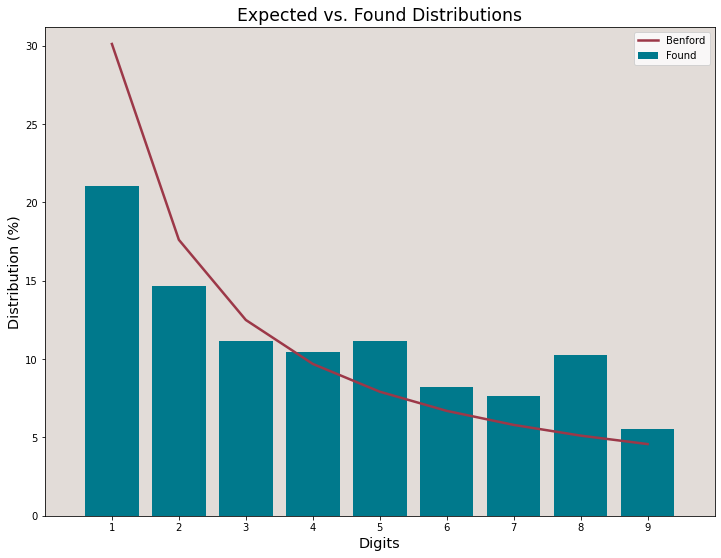

In [141]:
'''pip install benford_py'''
import benford as bf
f1d = bf.first_digits(df_ap['Amount'], digs=1)

In [142]:
f1d['diff'] = f1d['Found'] - f1d['Expected']

In [143]:
f1d.sort_values('diff')

Counts  Found  Expected  diff
First_1_Dig                               
1               210   0.21      0.30 -0.09
2               146   0.15      0.18 -0.03
3               111   0.11      0.12 -0.01
4               104   0.10      0.10  0.01
9                55   0.06      0.05  0.01
6                82   0.08      0.07  0.02
7                76   0.08      0.06  0.02
5               111   0.11      0.08  0.03
8               102   0.10      0.05  0.05

In [144]:
df_ap['first_digit'] = df_ap['Amount'].astype(str).str.replace('-','').str.replace('.','').str.lstrip('0').str[0]

In [145]:
df_ap[df_ap['first_digit'] == "8"]

Supplier Number        Supplier Name Invoice Number Invoice Date  \
2            JH6327           Petty Cash     1DaQ134665   2020-10-03   
9            JH6327           Petty Cash     w6Hv958151   2020-09-15   
10           ZT2505      My Fake Company     1=Z;654653   2020-10-17   
11           JH6327           Petty Cash     1Kph502899   2020-10-19   
18           ZT2505      My Fake Company     n=f<553081   2020-10-12   
..              ...                  ...            ...          ...   
964          FK3659            Mending M     DKvX627067   2020-09-25   
974          EH3527       Cisco Services     aCLk598199   2020-10-23   
978          FK3659            Mending M     jlI8376546   2020-10-27   
988          XN4009  Taste of the Dragon     Cb]P417657   2020-05-22   
992          PR6166   Telling Ya Sponges     [ikM182584   2020-04-25   

       Amount Paid      Check   Pay Date Authorization           bins  \
2   84,225.00    X 367,774.00 2020-10-08          N AW  80,001-90,000   
9   84,225.00    X 367,728.00 2020-09-17         D.A.R  80,001-90,000   
10  80,193.18    X 367,825.00 2020-10-18           NAW  80,001-90,000   
11  84,225.00    X 367,849.00 2020-10-22           DAR  80,001-90,000   
18  84,225.00    X 367,803.00 2020-10-13         D.A.R  80,001-90,000   
..        ...  ...        ...        ...           ...            ...   
964 82,079.23    X 367,847.00 2020-10-26            NW  80,001-90,000   
974 85,744.55    X 367,937.00 2020-11-22         N.A.W  80,001-90,000   
978  8,942.04    X 367,943.00 2020-11-27           NAW       0-10,000   
988 87,712.03    X 367,334.00 2020-06-22           JRR  80,001-90,000   
992 85,476.01    X 367,256.00 2020-05-31           JTE  80,001-90,000   

    Pay_Weekday first_digit  
2      Thursday           8  
9      Thursday           8  
10       Sunday           8  
11     Thursday           8  
18      Tuesday           8  
..          ...         ...  
964      Monday           8  
974      Sunday           8  
978      Friday           8  
988      Monday           8  
992      Sunday           8  

[102 rows x 12 columns]


Initialized sequence with 997 registries.

Test performed on 997 registries.
Discarded 0 records < 10 after preparation.


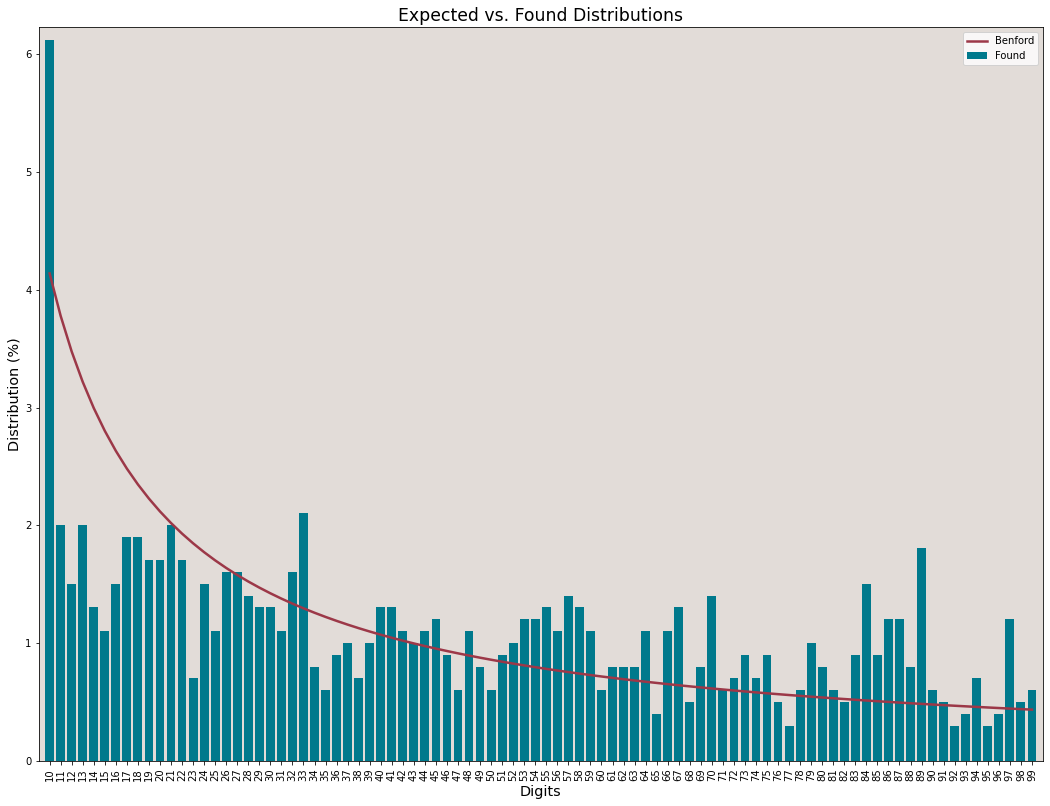

In [146]:
f1d = bf.first_digits(df_ap['Amount'], digs=2)

In [147]:
f1d['diff'] = f1d['Found'] - f1d['Expected']

In [148]:
f1d.sort_values('diff')

Counts  Found  Expected  diff
First_2_Dig                               
12               15   0.02      0.03 -0.02
11               20   0.02      0.04 -0.02
15               11   0.01      0.03 -0.02
14               13   0.01      0.03 -0.02
13               20   0.02      0.03 -0.01
...             ...    ...       ...   ...
70               14   0.01      0.01  0.01
33               21   0.02      0.01  0.01
84               15   0.02      0.01  0.01
89               18   0.02      0.00  0.01
10               61   0.06      0.04  0.02

[90 rows x 4 columns]

In [149]:
df_ap['first_2_digit'] = df_ap['Amount'].astype(str).str.replace('-','').str.replace('.','').str.lstrip('0').str[0:2]

In [150]:
df_ap[df_ap['first_2_digit'] == '10']

Supplier Number      Supplier Name Invoice Number Invoice Date     Amount  \
13           EY0705       David's Cash     <DtB532044   2020-02-16  10,403.67   
28           DQ1027       Felon You Up     @eA[926845   2020-01-17 107,994.97   
33           EU3308              Yahoo     <Qqg218338   2020-02-02 109,353.70   
43           NC3691     Hunter Backman     _SEL204430   2020-02-19 108,000.00   
57           BH5334    Aluminum Siding     T;g@262284   2020-03-19 102,913.15   
..              ...                ...            ...          ...        ...   
924          GH9453     Mmind Enchance     `a`i149640   2020-07-20   1,093.53   
928          CJ3092      Rebecca Smith     uBli488414   2020-07-27 104,957.81   
945          AW4588  Justin Timberlake     :Um7143245   2020-08-28  10,725.78   
962          IW4469        Oh Where Go     3MPP203142   2020-09-22 102,996.67   
981          ZI0783     Art's Ceramics     B?^j628088   2020-11-01 101,392.47   

    Paid      Check   Pay Date Authorization             bins Pay_Weekday  \
13     X 367,071.00 2020-02-19         D.A.R    10,001-20,000   Wednesday   
28     X 367,037.00 2020-02-12           DAR  100,001-150,000   Wednesday   
33     X 367,092.00 2020-02-26           NAW  100,001-150,000   Wednesday   
43     X 367,149.00 2020-03-15           NAW  100,001-150,000      Sunday   
57     X 367,229.00 2020-04-16           NAW  100,001-150,000    Thursday   
..   ...        ...        ...           ...              ...         ...   
924    X 367,638.00 2020-08-18           NAW         0-10,000     Tuesday   
928    X 367,663.00 2020-08-25            NW  100,001-150,000     Tuesday   
945    X 367,752.00 2020-09-27            MA    10,001-20,000      Sunday   
962    X 367,840.00 2020-10-23            MA  100,001-150,000      Friday   
981    X 367,958.00 2020-12-01            DR  100,001-150,000     Tuesday   

    first_digit first_2_digit  
13            1            10  
28            1            10  
33            1            10  
43            1            10  
57            1            10  
..          ...           ...  
924           1            10  
928           1            10  
945           1            10  
962           1            10  
981           1            10  

[61 rows x 13 columns]


Initialized sequence with 997 registries.

Test performed on 997 registries.
Discarded 0 records < 100 after preparation.


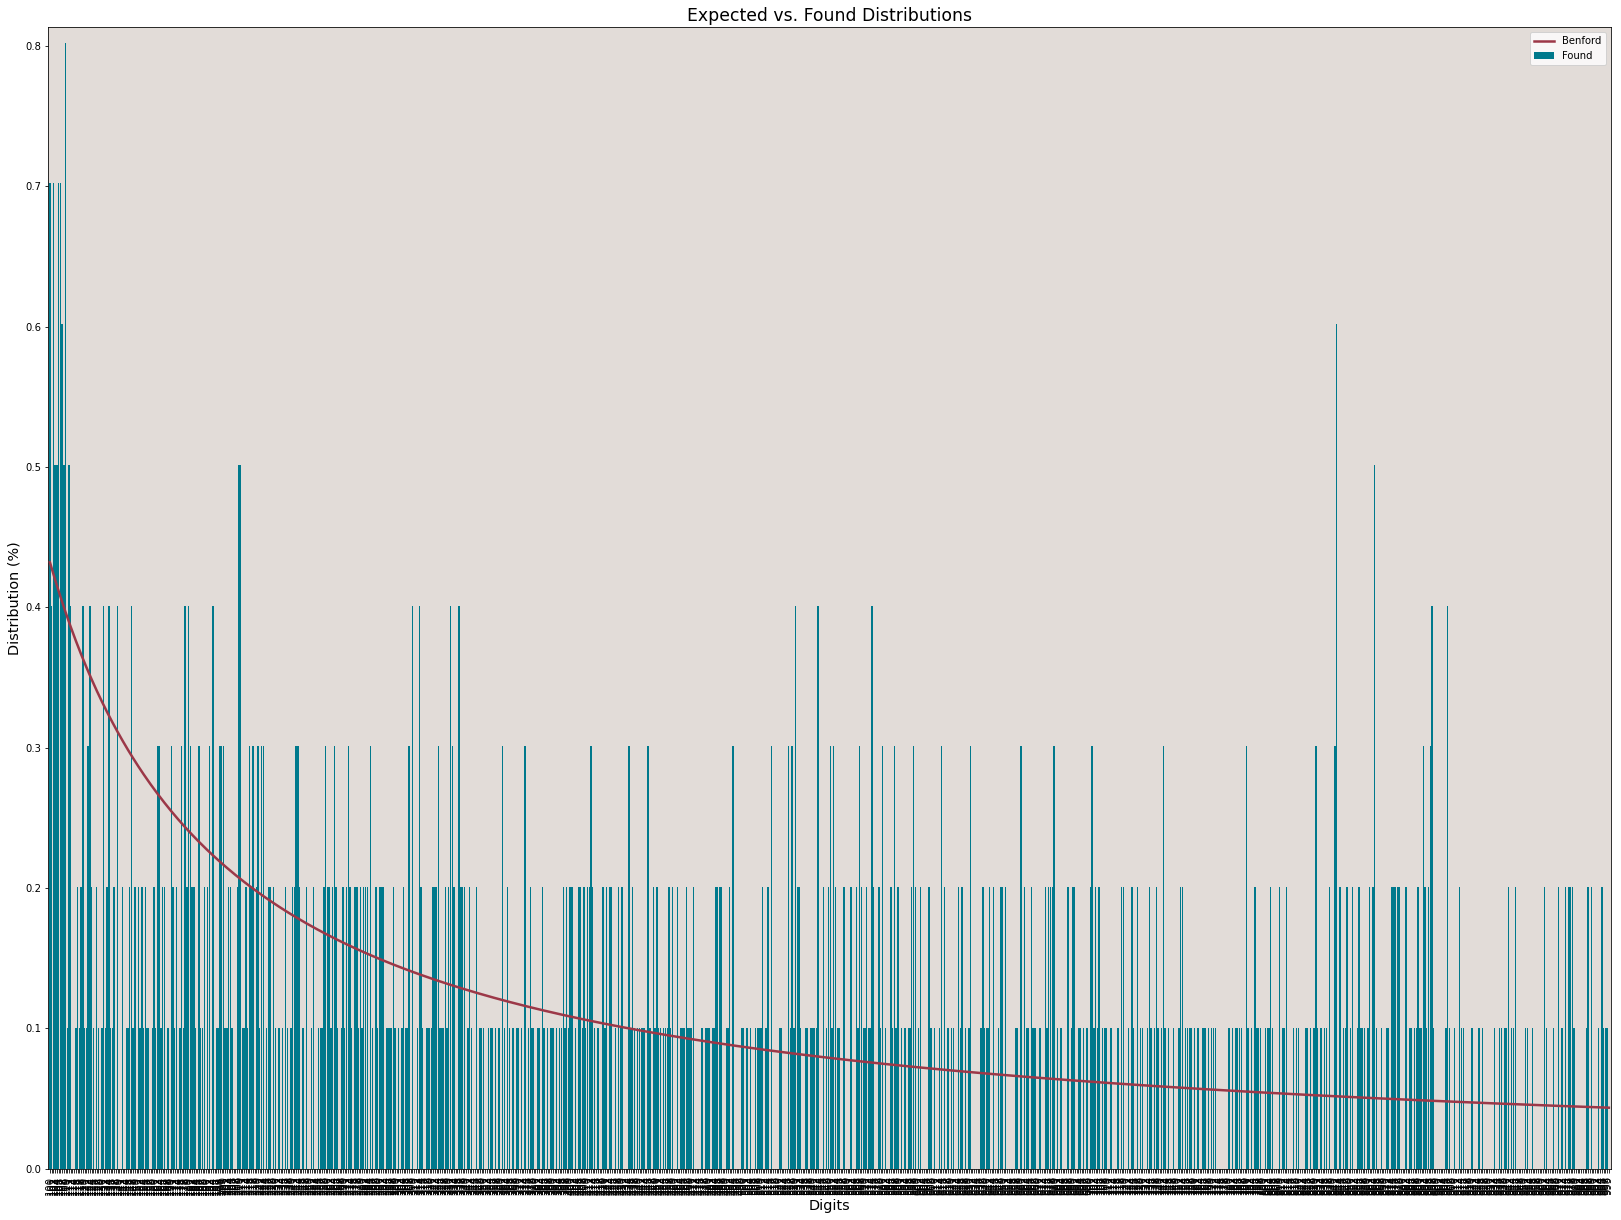

In [151]:
f1d = bf.first_digits(df_ap['Amount'], digs=3)

In [152]:
f1d['diff'] = f1d['Found'] - f1d['Expected']

In [153]:
f1d.sort_values('diff')

Counts  Found  Expected  diff
First_3_Dig                               
113            0.00   0.00      0.00 -0.00
114            0.00   0.00      0.00 -0.00
126            0.00   0.00      0.00 -0.00
129            0.00   0.00      0.00 -0.00
138            0.00   0.00      0.00 -0.00
...             ...    ...       ...   ...
897            4.00   0.00      0.00  0.00
906            4.00   0.00      0.00  0.00
109            8.00   0.01      0.00  0.00
864            5.00   0.01      0.00  0.00
842            6.00   0.01      0.00  0.01

[900 rows x 4 columns]

In [154]:
df_ap['first_3_digit'] = df_ap['Amount'].astype(str).str.replace('-','').str.replace('.','').str.lstrip('0').str[0:3]

In [155]:
df_ap[df_ap['first_3_digit'] == '842']

Supplier Number    Supplier Name Invoice Number Invoice Date    Amount  \
2            JH6327       Petty Cash     1DaQ134665   2020-10-03 84,225.00   
9            JH6327       Petty Cash     w6Hv958151   2020-09-15 84,225.00   
11           JH6327       Petty Cash     1Kph502899   2020-10-19 84,225.00   
18           ZT2505  My Fake Company     n=f<553081   2020-10-12 84,225.00   
310          XL4385     Back to Back     VdfO334692   2020-09-07 84,225.00   
940          EU3308            Yahoo     TveC391472   2020-08-18 84,259.90   

    Paid      Check   Pay Date Authorization           bins Pay_Weekday  \
2      X 367,774.00 2020-10-08          N AW  80,001-90,000    Thursday   
9      X 367,728.00 2020-09-17         D.A.R  80,001-90,000    Thursday   
11     X 367,849.00 2020-10-22           DAR  80,001-90,000    Thursday   
18     X 367,803.00 2020-10-13         D.A.R  80,001-90,000     Tuesday   
310    X 367,770.00 2020-10-03            MA  80,001-90,000    Saturday   
940    X 367,730.00 2020-09-18           JRR  80,001-90,000      Friday   

    first_digit first_2_digit first_3_digit  
2             8            84           842  
9             8            84           842  
11            8            84           842  
18            8            84           842  
310           8            84           842  
940           8            84           842

### 26b-04
To identify duplicates look for duplicates values where the supplier number and amount are duplicated

In [156]:
df_ap[df_ap.duplicated(subset=['Supplier Number', 'Amount'], keep=False)]

Supplier Number  Supplier Name Invoice Number Invoice Date    Amount Paid  \
2            JH6327     Petty Cash     1DaQ134665   2020-10-03 84,225.00    X   
9            JH6327     Petty Cash     w6Hv958151   2020-09-15 84,225.00    X   
11           JH6327     Petty Cash     1Kph502899   2020-10-19 84,225.00    X   
273          CJ3092  Rebecca Smith     ;D3Y137233   2020-06-26    163.40    X   
904          CJ3092  Rebecca Smith     Hcly751094   2020-06-12    163.40    X   

         Check   Pay Date Authorization           bins Pay_Weekday  \
2   367,774.00 2020-10-08          N AW  80,001-90,000    Thursday   
9   367,728.00 2020-09-17         D.A.R  80,001-90,000    Thursday   
11  367,849.00 2020-10-22           DAR  80,001-90,000    Thursday   
273 367,531.00 2020-07-21         D.A.R       0-10,000     Tuesday   
904 367,490.00 2020-07-12            NW       0-10,000      Sunday   

    first_digit first_2_digit first_3_digit  
2             8            84           842  
9             8            84           842  
11            8            84           842  
273           1            16           163  
904           1            16           163

### 26b-05
Determine Supplier Number with Different Payees

Hint: Google "group by count the number of unique values pandas"

Supplier Number with different payees. 
I wasn't sure how to do this so I googled it and found the following source

Google:
group by count the number of unique values pandas

https://stackoverflow.com/questions/38309729/count-unique-values-with-pandas-per-groups

1. What I did was group the supplier number and calculate the unique values for payees. I then saved it to sup_uniq_pay
2. I then filter where there were more than 2 unique payees I saved it as a list to filter the main dataset by the list of supplier numbers
3. last I saved the transactions with multiple payees to sup_uniq_pay_trans
4. I did group the supplier and payees in a group by to see that I each of the supplier names have at least two items listed.


In [157]:
sup_uniq_pay = df_ap.groupby('Supplier Number')['Supplier Name'].nunique().reset_index()
sup_uniq_pay

Supplier Number  Supplier Name
0           AW4588              1
1           BH5334              1
2           BJ9507              1
3           BO8774              1
4           CH9705              1
..             ...            ...
43          XL4385              1
44          XN4009              1
45          YB1642              1
46          ZI0783              1
47          ZT2505              1

[48 rows x 2 columns]

In [158]:
df_ap[df_ap['Supplier Number'] == 'ZT2505'].groupby(['Supplier Number', 'Supplier Name'])['Supplier Name'].agg(['count'])

count
Supplier Number Supplier Name         
ZT2505          My Fake Company     24

In [159]:
sup_uniq_pay[sup_uniq_pay['Supplier Name']>=2]

Supplier Number  Supplier Name
18          GL9674              2

In [160]:
filter_list = list(sup_uniq_pay[sup_uniq_pay['Supplier Name']>=2]['Supplier Number'])
filter_list

['GL9674']

In [161]:
df_ap[df_ap['Supplier Number'] == 'GL9674']['Supplier Name'].unique()

array(['Nick Tolle', 'What With Blue'], dtype=object)

In [162]:
sup_uniq_pay_trans = df_ap[df_ap['Supplier Number'].isin(filter_list)]
sup_uniq_pay_trans

Supplier Number   Supplier Name Invoice Number Invoice Date     Amount  \
37           GL9674      Nick Tolle     1aqn233171   2020-02-09  42,342.49   
68           GL9674      Nick Tolle     z3;B848778   2020-04-06  19,489.62   
138          GL9674  What With Blue     SS\E248945   2020-08-08  17,995.14   
194          GL9674  What With Blue     D<bY396480   2020-01-17  54,352.89   
271          GL9674  What With Blue     y]cz961273   2020-06-29     292.05   
292          GL9674  What With Blue     k1sm581476   2020-07-24   3,210.92   
344          GL9674  What With Blue     r70x675878   2020-10-22  97,945.05   
447          GL9674  What With Blue     YT69564573   2020-07-12  24,255.25   
622          GL9674  What With Blue     XwwS197930   2020-09-18      28.94   
772          GL9674  What With Blue     xC7:468410   2020-08-25 107,547.18   
852          GL9674  What With Blue     7Vrp385837   2020-02-19  78,492.98   
864          GL9674  What With Blue     5rae193721   2020-03-09  44,537.24   
966          GL9674  What With Blue     zOHy713949   2020-09-28  58,598.10   

    Paid      Check   Pay Date Authorization             bins Pay_Weekday  \
37     X 367,115.00 2020-03-06           NAW    40,001-50,000      Friday   
68     X 367,268.00 2020-04-28          NA W    10,001-20,000     Tuesday   
138    X 367,692.00 2020-09-03         N.A.W    10,001-20,000    Thursday   
194    X 367,044.00 2020-02-12            MA    50,001-60,000   Wednesday   
271    X 367,519.00 2020-07-24           NAW         0-10,000      Friday   
292    X 367,640.00 2020-08-20           DAR         0-10,000    Thursday   
344    X 367,917.00 2020-11-16           NAW   90,001-100,000      Monday   
447    X 367,590.00 2020-08-08           JTE    20,001-30,000    Saturday   
622    X 367,815.00 2020-10-16           NAW         0-10,000      Friday   
772    X 367,744.00 2020-09-24         N.A.W  100,001-150,000    Thursday   
852    X 367,164.00 2020-03-20           NAW    70,001-80,000      Friday   
864    X 367,216.00 2020-04-09            MA    40,001-50,000    Thursday   
966    X 367,865.00 2020-10-29            MA    50,001-60,000    Thursday   

    first_digit first_2_digit first_3_digit  
37            4            42           423  
68            1            19           194  
138           1            17           179  
194           5            54           543  
271           2            29           292  
292           3            32           321  
344           9            97           979  
447           2            24           242  
622           2            28           289  
772           1            10           107  
852           7            78           784  
864           4            44           445  
966           5            58           585

Looks like my filter worked all the items displayed have at least two payees.

In [163]:
sup_uniq_pay_trans.groupby(['Supplier Number', 'Supplier Name'])['Amount'].agg(['count', 'sum'])

count        sum
Supplier Number Supplier Name                   
GL9674          Nick Tolle          2  61,832.11
                What With Blue     11 487,255.74

I filtered them in the transaction table so I could see them transactionally as well

In [164]:
sup_uniq_pay_trans.sort_values(['Supplier Number', 'Supplier Name'])

Supplier Number   Supplier Name Invoice Number Invoice Date     Amount  \
37           GL9674      Nick Tolle     1aqn233171   2020-02-09  42,342.49   
68           GL9674      Nick Tolle     z3;B848778   2020-04-06  19,489.62   
138          GL9674  What With Blue     SS\E248945   2020-08-08  17,995.14   
194          GL9674  What With Blue     D<bY396480   2020-01-17  54,352.89   
271          GL9674  What With Blue     y]cz961273   2020-06-29     292.05   
292          GL9674  What With Blue     k1sm581476   2020-07-24   3,210.92   
344          GL9674  What With Blue     r70x675878   2020-10-22  97,945.05   
447          GL9674  What With Blue     YT69564573   2020-07-12  24,255.25   
622          GL9674  What With Blue     XwwS197930   2020-09-18      28.94   
772          GL9674  What With Blue     xC7:468410   2020-08-25 107,547.18   
852          GL9674  What With Blue     7Vrp385837   2020-02-19  78,492.98   
864          GL9674  What With Blue     5rae193721   2020-03-09  44,537.24   
966          GL9674  What With Blue     zOHy713949   2020-09-28  58,598.10   

    Paid      Check   Pay Date Authorization             bins Pay_Weekday  \
37     X 367,115.00 2020-03-06           NAW    40,001-50,000      Friday   
68     X 367,268.00 2020-04-28          NA W    10,001-20,000     Tuesday   
138    X 367,692.00 2020-09-03         N.A.W    10,001-20,000    Thursday   
194    X 367,044.00 2020-02-12            MA    50,001-60,000   Wednesday   
271    X 367,519.00 2020-07-24           NAW         0-10,000      Friday   
292    X 367,640.00 2020-08-20           DAR         0-10,000    Thursday   
344    X 367,917.00 2020-11-16           NAW   90,001-100,000      Monday   
447    X 367,590.00 2020-08-08           JTE    20,001-30,000    Saturday   
622    X 367,815.00 2020-10-16           NAW         0-10,000      Friday   
772    X 367,744.00 2020-09-24         N.A.W  100,001-150,000    Thursday   
852    X 367,164.00 2020-03-20           NAW    70,001-80,000      Friday   
864    X 367,216.00 2020-04-09            MA    40,001-50,000    Thursday   
966    X 367,865.00 2020-10-29            MA    50,001-60,000    Thursday   

    first_digit first_2_digit first_3_digit  
37            4            42           423  
68            1            19           194  
138           1            17           179  
194           5            54           543  
271           2            29           292  
292           3            32           321  
344           9            97           979  
447           2            24           242  
622           2            28           289  
772           1            10           107  
852           7            78           784  
864           4            44           445  
966           5            58           585

### 26b-06
Test for gaps in check number

In [165]:
df_ap = df_ap.sort_values('Check').reset_index().drop(columns=['index'])

df_ap['Cell Before'] = df_ap['Check'].shift(1)

df_ap['Gap'] = df_ap['Check'] - df_ap['Cell Before']
df_ap['# of Missing Items'] = df_ap['Gap']-1

df_ap[df_ap['Gap']>1]

Supplier Number        Supplier Name Invoice Number Invoice Date  \
806          JZ7189    Want some up dog?     bDRe625311   2020-09-14   
927          XF6148           Bazo Bucks     RG_6359939   2020-10-20   
944          JZ7189    Want some up dog?     dOFd402698   2020-10-31   
973          OZ0317  Lighting Bright LLC     y9@u897021   2020-11-02   
974          QE4715        AZ Telephones     Gfx:721133   2020-10-31   

       Amount Paid      Check   Pay Date Authorization           bins  \
806    263.05    X 367,806.00 2020-10-13           NAW       0-10,000   
927 26,026.15    X 367,928.00 2020-11-20           JTE  20,001-30,000   
944  8,515.10    X 367,947.00 2020-11-28         N.A.W       0-10,000   
973 18,676.77    X 367,981.00 2020-12-01           NAW  10,001-20,000   
974 54,001.87    X 367,996.00 2020-12-15           JTE  50,001-60,000   

    Pay_Weekday first_digit first_2_digit first_3_digit  Cell Before   Gap  \
806     Tuesday           2            26           263   367,804.00  2.00   
927      Friday           2            26           260   367,926.00  2.00   
944    Saturday           8            85           851   367,944.00  3.00   
973     Tuesday           1            18           186   367,975.00  6.00   
974     Tuesday           5            54           540   367,981.00 15.00   

     # of Missing Items  
806                1.00  
927                1.00  
944                2.00  
973                5.00  
974               14.00

### 26b-07
Identify working days on which no payments were processed
1. Ignore Weekends
2. Ignore Holidays

In [166]:
print(df_ap['Pay Date'].min())
print(df_ap['Pay Date'].max())

2020-01-12 00:00:00
2020-12-29 00:00:00


In [167]:
#Identify holidays in the year's we are examining
import holidays

start_year = df_ap['Pay Date'].min().year
end_year = df_ap['Pay Date'].max().year

date_list = []
for i in range(start_year, end_year + 1):
    date_list.append(i)
    
us_holidays = holidays.UnitedStates(years = date_list)
us_holidays = pd.DataFrame(us_holidays.items(), columns=['Date', 'Holidays'])
us_holidays['Date'] = pd.to_datetime(us_holidays['Date'])
us_holidays

Date                     Holidays
0  2020-01-01               New Year's Day
1  2020-01-20   Martin Luther King Jr. Day
2  2020-02-17        Washington's Birthday
3  2020-05-25                 Memorial Day
4  2020-07-04             Independence Day
5  2020-07-03  Independence Day (Observed)
6  2020-09-07                    Labor Day
7  2020-10-12                 Columbus Day
8  2020-11-11                 Veterans Day
9  2020-11-26                 Thanksgiving
10 2020-12-25                Christmas Day

In [168]:
#This looks up the day before
#additionally it fills the first row with the 
#minimum value since the next step won't work on an empty row.
df_ap = df_ap.sort_values('Pay Date').reset_index().drop(columns=['index'])
df_ap['Date Cell Before'] = df_ap['Pay Date'].shift(1)
df_ap['Date Cell Before'] = df_ap['Date Cell Before'].fillna(df_ap['Pay Date'].min())

In [169]:
#This create a list of the date before and the date of the pay date
'''We then use the np.busday_count to calculate the days between the 
our two lists and the holidays defined above. It excludes weekends by default'''
import numpy as np
start_dates = [d.date() for d in df_ap['Date Cell Before']]
end_dates = [d.date() for d in df_ap['Pay Date']]
df_ap['Date Gap'] = np.busday_count(start_dates, end_dates, holidays=list(us_holidays['Date'].values.astype('datetime64[D]'))) - 1

In [170]:
df_ap[df_ap['Date Gap']>0]

Supplier Number           Supplier Name Invoice Number Invoice Date  \
1            XN4009     Taste of the Dragon     oe>_912383   2020-01-17   
2            RB5959         Spalding Siding     cJ5k167589   2020-01-04   
10           EV7305  Michele's Lawn Service     BAqH664553   2020-01-06   
30           XL4385            Back to Back     LHRT154498   2020-01-13   
49           BJ9507        Slinger Staplers     >YOk289790   2020-01-14   
..              ...                     ...            ...          ...   
919          WD8419             Star Clover     `6C6643923   2020-10-20   
947          RB5959         Spalding Siding     aDIs422223   2020-10-31   
969          EY8784         Friction Finder     9bkO328621   2020-11-03   
984          QE4715           AZ Telephones     tVF<372989   2020-11-16   
998          MN2162         foxhole fossils     V\P`747083   2020-11-19   

        Amount Paid      Check   Pay Date Authorization             bins  \
1     3,046.88    X 367,052.00 2020-01-15           NAW         0-10,000   
2    61,452.65    X 367,001.00 2020-02-02           JTE    60,001-70,000   
10    1,331.27    X 367,014.00 2020-02-05           JTE         0-10,000   
30   45,528.91    X 367,048.00 2020-02-12           NAW    40,001-50,000   
49   66,380.26    X 367,049.00 2020-02-15           JTE    60,001-70,000   
..         ...  ...        ...        ...           ...              ...   
919 107,369.08    X 367,926.00 2020-11-19           DAR  100,001-150,000   
947   3,412.74    X 367,941.00 2020-11-26           NAW         0-10,000   
969  79,537.00    X 367,970.00 2020-12-03           N.A    70,001-80,000   
984  13,925.41  NaN        nan 2020-12-10         N.A.W    10,001-20,000   
998     230.77  NaN        nan 2020-12-29         N.A.W         0-10,000   

    Pay_Weekday first_digit first_2_digit first_3_digit  Cell Before  Gap  \
1     Wednesday           3            30           304   367,051.00 1.00   
2        Sunday           6            61           614          nan  nan   
10    Wednesday           1            13           133   367,013.00 1.00   
30    Wednesday           4            45           455   367,047.00 1.00   
49     Saturday           6            66           663   367,048.00 1.00   
..          ...         ...           ...           ...          ...  ...   
919    Thursday           1            10           107   367,925.00 1.00   
947    Thursday           3            34           341   367,940.00 1.00   
969    Thursday           7            79           795   367,969.00 1.00   
984    Thursday           1            13           139          nan  nan   
998     Tuesday           2            23           230          nan  nan   

     # of Missing Items Date Cell Before  Date Gap  
1                  0.00       2020-01-12         1  
2                   nan       2020-01-15        11  
10                 0.00       2020-02-03         1  
30                 0.00       2020-02-10         1  
49                 0.00       2020-02-12         2  
..                  ...              ...       ...  
919                0.00       2020-11-16         2  
947                0.00       2020-11-24         1  
969                0.00       2020-12-01         1  
984                 nan       2020-12-08         1  
998                 nan       2020-12-15         8  

[45 rows x 19 columns]

In [171]:
#I created a calendar to so I can visualize the gaps between the dates
start= df_ap['Pay Date'].min()
end=df_ap['Pay Date'].max()
df_cal = pd.DataFrame({"Date": pd.date_range(start, end)})
df_cal["Day"] = df_cal.Date.dt.day_name()

In [172]:
df_cal = pd.merge(df_cal[['Date', 'Day']], us_holidays, how='left', on='Date')

In [173]:
df_full = pd.merge(df_cal, df_ap, how='left', left_on='Date', right_on='Pay Date')

In [174]:
df_full[(df_full['Date']>'2020-01-10') & 
        (df_full['Date']<'2020-02-05') &
       (df_full['Day'].isin(['Sunday', 'Saturday']) == False)&
       (df_full['Holidays'].isnull())].drop_duplicates(subset='Date')

Date        Day Holidays Supplier Number        Supplier Name  \
1  2020-01-13     Monday      NaN             NaN                  NaN   
2  2020-01-14    Tuesday      NaN             NaN                  NaN   
3  2020-01-15  Wednesday      NaN          XN4009  Taste of the Dragon   
4  2020-01-16   Thursday      NaN             NaN                  NaN   
5  2020-01-17     Friday      NaN             NaN                  NaN   
9  2020-01-21    Tuesday      NaN             NaN                  NaN   
10 2020-01-22  Wednesday      NaN             NaN                  NaN   
11 2020-01-23   Thursday      NaN             NaN                  NaN   
12 2020-01-24     Friday      NaN             NaN                  NaN   
15 2020-01-27     Monday      NaN             NaN                  NaN   
16 2020-01-28    Tuesday      NaN             NaN                  NaN   
17 2020-01-29  Wednesday      NaN             NaN                  NaN   
18 2020-01-30   Thursday      NaN             NaN                  NaN   
19 2020-01-31     Friday      NaN             NaN                  NaN   
24 2020-02-03     Monday      NaN          EY8784      Friction Finder   
29 2020-02-04    Tuesday      NaN             NaN                  NaN   

   Invoice Number Invoice Date   Amount Paid      Check   Pay Date  \
1             NaN          NaT      nan  NaN        nan        NaT   
2             NaN          NaT      nan  NaN        nan        NaT   
3      oe>_912383   2020-01-17 3,046.88    X 367,052.00 2020-01-15   
4             NaN          NaT      nan  NaN        nan        NaT   
5             NaN          NaT      nan  NaN        nan        NaT   
9             NaN          NaT      nan  NaN        nan        NaT   
10            NaN          NaT      nan  NaN        nan        NaT   
11            NaN          NaT      nan  NaN        nan        NaT   
12            NaN          NaT      nan  NaN        nan        NaT   
15            NaN          NaT      nan  NaN        nan        NaT   
16            NaN          NaT      nan  NaN        nan        NaT   
17            NaN          NaT      nan  NaN        nan        NaT   
18            NaN          NaT      nan  NaN        nan        NaT   
19            NaN          NaT      nan  NaN        nan        NaT   
24     0zLR206127   2020-01-04 7,686.52    X 367,004.00 2020-02-03   
29            NaN          NaT      nan  NaN        nan        NaT   

   Authorization      bins Pay_Weekday first_digit first_2_digit  \
1            NaN       NaN         NaN         NaN           NaN   
2            NaN       NaN         NaN         NaN           NaN   
3            NAW  0-10,000   Wednesday           3            30   
4            NaN       NaN         NaN         NaN           NaN   
5            NaN       NaN         NaN         NaN           NaN   
9            NaN       NaN         NaN         NaN           NaN   
10           NaN       NaN         NaN         NaN           NaN   
11           NaN       NaN         NaN         NaN           NaN   
12           NaN       NaN         NaN         NaN           NaN   
15           NaN       NaN         NaN         NaN           NaN   
16           NaN       NaN         NaN         NaN           NaN   
17           NaN       NaN         NaN         NaN           NaN   
18           NaN       NaN         NaN         NaN           NaN   
19           NaN       NaN         NaN         NaN           NaN   
24           CAB  0-10,000      Monday           7            76   
29           NaN       NaN         NaN         NaN           NaN   

   first_3_digit  Cell Before  Gap  # of Missing Items Date Cell Before  \
1            NaN          nan  nan                 nan              NaT   
2            NaN          nan  nan                 nan              NaT   
3            304   367,051.00 1.00                0.00       2020-01-12   
4            NaN          nan  nan                 nan              NaT   
5            NaN          n

In [175]:
df_ap[df_ap['Pay Date'] == '2020-02-03']

Supplier Number    Supplier Name Invoice Number Invoice Date    Amount Paid  \
5          EY8784  Friction Finder     0zLR206127   2020-01-04  7,686.52    X   
6          EH3527   Cisco Services     y?HL101612   2020-01-07 42,398.16    X   
7          ZT2505  My Fake Company     GmS^674196   2020-01-08 10,803.44    X   
8          YB1642  Jessica Johnson     2IP]982084   2020-01-10 72,537.39    X   
9          WD8419      Star Clover     U9QC724041   2020-01-06  5,078.52    X   

       Check   Pay Date Authorization           bins Pay_Weekday first_digit  \
5 367,004.00 2020-02-03           CAB       0-10,000      Monday           7   
6 367,005.00 2020-02-03           NAW  40,001-50,000      Monday           4   
7 367,006.00 2020-02-03           NAW  10,001-20,000      Monday           1   
8 367,007.00 2020-02-03         N.A.W  70,001-80,000      Monday           7   
9 367,008.00 2020-02-03            MA       0-10,000      Monday           5   

  first_2_digit first_3_digit  Cell Before  Gap  # of Missing Items  \
5            76           768   367,003.00 1.00                0.00   
6            42           423   367,004.00 1.00                0.00   
7            10           108   367,005.00 1.00                0.00   
8            72           725   367,006.00 1.00                0.00   
9            50           507   367,007.00 1.00                0.00   

  Date Cell Before  Date Gap  
5       2020-02-02        -1  
6       2020-02-03        -1  
7       2020-02-03        -1  
8       2020-02-03        -1  
9       2020-02-03        -1

### 26b-08
Payment Term Analysis

Let's pretend the company has a policy to pay all invoices within 35 days determine the number of transactions and amount of invoices outside of policy

Bonus see if there is anything unusual about the time to make payments

In [176]:
df_ap['Days for Pmt'] = (df_ap['Pay Date'] - df_ap['Invoice Date']).dt.days

In [177]:
df_ap['Days for Pmt'].describe()

count   999.00
mean     27.08
std       5.97
min      -6.00
25%      26.00
50%      28.00
75%      29.00
max      60.00
Name: Days for Pmt, dtype: float64

In [178]:
df_ap.sort_values('Days for Pmt')

Supplier Number         Supplier Name Invoice Number Invoice Date  \
570          OS6970       Telephone Fixer     7yY=618258   2020-08-09   
574          SV2210       Pegasus Flights     IEFK773193   2020-08-09   
578          PR6166    Telling Ya Sponges     sezZ526028   2020-08-09   
1            XN4009   Taste of the Dragon     oe>_912383   2020-01-17   
581          NC3691        Hunter Backman     >^Lx976381   2020-08-09   
..              ...                   ...            ...          ...   
145          ZI0783        Art's Ceramics     2gfh444898   2020-01-15   
143          PR9055  Satefy Equipment Inc     ^z@6979471   2020-01-15   
147          CJ3092         Rebecca Smith     ?IFN805014   2020-01-15   
600          NG6532          Ryder Rental     \uYE529866   2020-06-12   
155          JT9532          Terresa Sing     mOt`229830   2020-01-15   

       Amount Paid      Check   Pay Date Authorization           bins  \
570 70,879.64    X 367,575.00 2020-08-03            NW  70,001-80,000   
574 84,152.39    X 367,579.00 2020-08-04            MA  80,001-90,000   
578  8,926.24    X 367,586.00 2020-08-07           JTE       0-10,000   
1    3,046.88    X 367,052.00 2020-01-15           NAW       0-10,000   
581  5,110.66    X 367,583.00 2020-08-07           NAW       0-10,000   
..        ...  ...        ...        ...           ...            ...   
145  6,672.48    X 367,142.00 2020-03-12           NAW       0-10,000   
143  1,603.90    X 367,140.00 2020-03-12         D.A.R       0-10,000   
147 10,742.58    X 367,144.00 2020-03-13           CAB  10,001-20,000   
600 14,915.39    X 367,473.00 2020-08-09         N.A.W  10,001-20,000   
155 22,933.74    X 367,150.00 2020-03-15         N.A.W  20,001-30,000   

    Pay_Weekday first_digit first_2_digit first_3_digit  Cell Before  Gap  \
570      Monday           7            70           708   367,574.00 1.00   
574     Tuesday           8            84           841   367,578.00 1.00   
578      Friday           8            89           892   367,585.00 1.00   
1     Wednesday           3            30           304   367,051.00 1.00   
581      Friday           5            51           511   367,582.00 1.00   
..          ...         ...           ...           ...          ...  ...   
145    Thursday           6            66           667   367,141.00 1.00   
143    Thursday           1            16           160   367,139.00 1.00   
147      Friday           1            10           107   367,143.00 1.00   
600      Sunday           1            14           149   367,472.00 1.00   
155      Sunday           2            22           229   367,149.00 1.00   

     # of Missing Items Date Cell Before  Date Gap  Days for Pmt  
570                0.00       2020-08-01        -1            -6  
574                0.00       2020-08-03         0            -5  
578                0.00       2020-08-06         0            -2  
1                  0.00       2020-01-12         1            -2  
581                0.00       2020-08-07        -1            -2  
..                  ...              ...       ...           ...  
145                0.00       2020-03-12        -1            57  
143                0.00       2020-03-10         1            57  
147                0.00       2020-03-13        -1            58  
600                0.00       2020-08-08        -1            58  
155                0.00       2020-03-15        -1            60  

[999 rows x 20 columns]

In [179]:
df_ap['Days for Pmt'].max()

60

In [180]:
df_ap['Days for Pmt'].mean()

27.077077077077078

In [181]:
df_ap[(df_ap['Days for Pmt']>35)]['Amount'].agg(['sum', 'count'])

sum     502,358.37
count        17.00
Name: Amount, dtype: float64

In [182]:
df_ap[(df_ap['Days for Pmt']>35)]

Supplier Number         Supplier Name Invoice Number Invoice Date  \
50           XF6148            Bazo Bucks     f/[@497925   2020-01-08   
66           RB5959       Spalding Siding     QQMl387024   2020-01-14   
101          EU3308                 Yahoo     13ib403399   2020-01-10   
128          OZ0317   Lighting Bright LLC     i`QT772945   2020-01-26   
138          JT9532          Terresa Sing     d\Bh427087   2020-01-15   
143          PR9055  Satefy Equipment Inc     ^z@6979471   2020-01-15   
145          ZI0783        Art's Ceramics     2gfh444898   2020-01-15   
147          CJ3092         Rebecca Smith     ?IFN805014   2020-01-15   
155          JT9532          Terresa Sing     mOt`229830   2020-01-15   
290          EU3308                 Yahoo     qobk751153   2020-03-31   
352          PR6166    Telling Ya Sponges     [ikM182584   2020-04-25   
396          SV2210       Pegasus Flights     mJ1H152447   2020-05-07   
600          NG6532          Ryder Rental     \uYE529866   2020-06-12   
618          NG6532          Ryder Rental     TU69436275   2020-07-06   
939          DQ1027          Felon You Up     6qA;209783   2020-10-16   
996          QE4715         AZ Telephones     Gfx:721133   2020-10-31   
998          MN2162       foxhole fossils     V\P`747083   2020-11-19   

       Amount Paid      Check   Pay Date Authorization            bins  \
50  40,020.89    X 367,050.00 2020-02-15           DAR   40,001-50,000   
66  44,808.63    X 367,077.00 2020-02-19            MA   40,001-50,000   
101 82,769.51    X 367,016.00 2020-02-28           NAW   80,001-90,000   
128  7,560.37    X 367,130.00 2020-03-09           NAW        0-10,000   
138  8,641.84    X 367,153.00 2020-03-10           NAW        0-10,000   
143  1,603.90    X 367,140.00 2020-03-12         D.A.R        0-10,000   
145  6,672.48    X 367,142.00 2020-03-12           NAW        0-10,000   
147 10,742.58    X 367,144.00 2020-03-13           CAB   10,001-20,000   
155 22,933.74    X 367,150.00 2020-03-15         N.A.W   20,001-30,000   
290 95,538.91    X 367,194.00 2020-05-08         N.A.W  90,001-100,000   
352 85,476.01    X 367,256.00 2020-05-31           JTE   80,001-90,000   
396  3,194.58    X 367,290.00 2020-06-13        P.J.M.        0-10,000   
600 14,915.39    X 367,473.00 2020-08-09         N.A.W   10,001-20,000   
618 22,671.06    X 367,612.00 2020-08-14           JTE   20,001-30,000   
939    575.84    X 367,816.00 2020-11-24           JTE        0-10,000   
996 54,001.87    X 367,996.00 2020-12-15           JTE   50,001-60,000   
998    230.77  NaN        nan 2020-12-29         N.A.W        0-10,000   

    Pay_Weekday first_digit first_2_digit first_3_digit  Cell Before   Gap  \
50     Saturday           4            40           400   367,049.00  1.00   
66    Wednesday           4            44           448   367,076.00  1.00   
101      Friday           8            82           827   367,015.00  1.00   
128      Monday           7            75           756   367,129.00  1.00   
138     Tuesday           8            86           864   367,152.00  1.00   
143    Thursday           1            16           160   367,139.00  1.00   
145    Thursday           6            66           667   367,141.00  1.00   
147      Friday           1            10           107   367,143.00  1.00   
155      Sunday           2            22           229   367,149.00  1.00   
290      Friday           9            95           955   367,193.00  1.00   
352      Sunday           8            85           854   367,255.00  1.00   
396    Saturday           3            31           319   367,289.00  1.00   
600      Sunday           1            14           149   367,472.00  1.00   
618      Friday           2            22           226   367,611.00  1.00   
939     Tuesday           5            57           575   367,815.00  1.00   
996     Tuesday           5            54           540   367,981.00 15.00   
998     Tuesday           2   

### 26b-09
Test that all payments are to vendor master on the "Vendor Master.csv" table

In [183]:
df_sup = pd.read_csv('Files/Vendor Master.csv')

In [184]:
df_ap.head()

Supplier Number        Supplier Name Invoice Number Invoice Date    Amount  \
0          FP5019            League NV     tQsv115299   2020-01-08 20,980.35   
1          XN4009  Taste of the Dragon     oe>_912383   2020-01-17  3,046.88   
2          RB5959      Spalding Siding     cJ5k167589   2020-01-04 61,452.65   
3          IE0907       Member Minders     ;he_674917   2020-01-04 89,359.22   
4          FB3282           The Police     <NT9605517   2020-01-05 84,644.62   

  Paid      Check   Pay Date Authorization           bins Pay_Weekday  \
0    X 367,028.00 2020-01-12           NAW  20,001-30,000      Sunday   
1    X 367,052.00 2020-01-15           NAW       0-10,000   Wednesday   
2    X 367,001.00 2020-02-02           JTE  60,001-70,000      Sunday   
3    X 367,002.00 2020-02-02            MA  80,001-90,000      Sunday   
4    X 367,003.00 2020-02-02            MA  80,001-90,000      Sunday   

  first_digit first_2_digit first_3_digit  Cell Before  Gap  \
0           2            20           209   367,027.00 1.00   
1           3            30           304   367,051.00 1.00   
2           6            61           614          nan  nan   
3           8            89           893   367,001.00 1.00   
4           8            84           846   367,002.00 1.00   

   # of Missing Items Date Cell Before  Date Gap  Days for Pmt  
0                0.00       2020-01-12        -1             4  
1                0.00       2020-01-12         1            -2  
2                 nan       2020-01-15        11            29  
3                0.00       2020-02-02        -1            29  
4                0.00       2020-02-02        -1            28

In [185]:
df_sup.head()

Supplier Number         Supplier Name        Street Address       State  \
0          PR9055  Satefy Equipment Inc    45347 CLUBHOUSE DR  CALIFORNIA   
1          PR6166    Telling Ya Sponges   454 ROCKERFELLER RD  CALIFORNIA   
2          EY8784       Friction Finder          1831 41ST AV  CALIFORNIA   
3          EY0705          David's Cash    24518 Mission Blvd  CALIFORNIA   
4          BO8774         Falling Signs  10114 SECRET ROSE ST  CALIFORNIA   

          City  Zip Code  Prior Year Amount  
0     TEMECULA 92,592.00         539,426.30  
1  BERRY CREEK 95,916.00         490,884.90  
2      OAKLAND 94,601.00         625,359.79  
3      Hayward 94,544.00       1,040,896.21  
4  BAKERSFIELD 93,311.00         438,643.80

In [186]:
df_ap_sup = pd.merge(df_ap, df_sup, how='left', left_on='Supplier Number', right_on='Supplier Number')

In [187]:
df_ap_sup.head()

Supplier Number      Supplier Name_x Invoice Number Invoice Date    Amount  \
0          FP5019            League NV     tQsv115299   2020-01-08 20,980.35   
1          XN4009  Taste of the Dragon     oe>_912383   2020-01-17  3,046.88   
2          RB5959      Spalding Siding     cJ5k167589   2020-01-04 61,452.65   
3          IE0907       Member Minders     ;he_674917   2020-01-04 89,359.22   
4          FB3282           The Police     <NT9605517   2020-01-05 84,644.62   

  Paid      Check   Pay Date Authorization           bins Pay_Weekday  \
0    X 367,028.00 2020-01-12           NAW  20,001-30,000      Sunday   
1    X 367,052.00 2020-01-15           NAW       0-10,000   Wednesday   
2    X 367,001.00 2020-02-02           JTE  60,001-70,000      Sunday   
3    X 367,002.00 2020-02-02            MA  80,001-90,000      Sunday   
4    X 367,003.00 2020-02-02            MA  80,001-90,000      Sunday   

  first_digit first_2_digit first_3_digit  Cell Before  Gap  \
0           2            20           209   367,027.00 1.00   
1           3            30           304   367,051.00 1.00   
2           6            61           614          nan  nan   
3           8            89           893   367,001.00 1.00   
4           8            84           846   367,002.00 1.00   

   # of Missing Items Date Cell Before  Date Gap  Days for Pmt  \
0                0.00       2020-01-12        -1             4   
1                0.00       2020-01-12         1            -2   
2                 nan       2020-01-15        11            29   
3                0.00       2020-02-02        -1            29   
4                0.00       2020-02-02        -1            28   

       Supplier Name_y          Street Address       State        City  \
0            League NV        415 E WILKEN WAY  CALIFORNIA     ANAHEIM   
1  Taste of the Dragon        1077 GRAY FOX CI  CALIFORNIA  PLEASANTON   
2      Spalding Siding        5 BAY BRIDGE  EB  CALIFORNIA     OAKLAND   
3       Member Minders             120 BUCK CT  CALIFORNIA     FREMONT   
4           The Police  2685 N ORANGE OLIVE RD  CALIFORNIA      Orange   

   Zip Code  Prior Year Amount  
0 92,802.00         775,768.28  
1 94,566.00         262,897.34  
2 94,607.00       1,009,525.57  
3 94,539.00         723,873.24  
4       nan         757,005.82

In [188]:
df_ap_sup[df_ap_sup['Supplier Name_y'].isnull()]

Supplier Number Supplier Name_x Invoice Number Invoice Date     Amount  \
32           JH6327      Petty Cash     <Xhm496276   2020-02-10  24,292.98   
272          JH6327      Petty Cash     v1x]239137   2020-04-28   3,136.22   
442          JH6327      Petty Cash     qTJY474429   2020-06-26 213,450.16   
730          JH6327      Petty Cash     w6Hv958151   2020-09-15  84,225.00   
793          JH6327      Petty Cash     1DaQ134665   2020-10-03  84,225.00   
841          JH6327      Petty Cash     1Kph502899   2020-10-19  84,225.00   
878          JH6327      Petty Cash     hwp>107425   2020-11-01  66,000.00   
927          JH6327      Petty Cash     N8UM608657   2020-11-19   3,282.28   

    Paid      Check   Pay Date Authorization             bins Pay_Weekday  \
32     X 367,046.00 2020-02-12         N.A.W    20,001-30,000   Wednesday   
272    X 367,270.00 2020-05-01            NW         0-10,000      Friday   
442    X 367,443.00 2020-06-30           NAW  150,001-250,000     Tuesday   
730    X 367,728.00 2020-09-17         D.A.R    80,001-90,000    Thursday   
793    X 367,774.00 2020-10-08          N AW    80,001-90,000    Thursday   
841    X 367,849.00 2020-10-22           DAR    80,001-90,000    Thursday   
878    X 367,875.00 2020-11-01           DAR    60,001-70,000      Sunday   
927  NaN        nan 2020-11-20         N.A.W         0-10,000      Friday   

    first_digit first_2_digit first_3_digit  Cell Before  Gap  \
32            2            24           242   367,045.00 1.00   
272           3            31           313   367,269.00 1.00   
442           2            21           213   367,442.00 1.00   
730           8            84           842   367,727.00 1.00   
793           8            84           842   367,773.00 1.00   
841           8            84           842   367,848.00 1.00   
878           6            66           660   367,874.00 1.00   
927           3            32           328          nan  nan   

     # of Missing Items Date Cell Before  Date Gap  Days for Pmt  \
32                 0.00       2020-02-12        -1             2   
272                0.00       2020-05-01        -1             3   
442                0.00       2020-06-30        -1             4   
730                0.00       2020-09-15         1             2   
793                0.00       2020-10-08        -1             5   
841                0.00       2020-10-22        -1             3   
878                0.00       2020-11-01        -1             0   
927                 nan       2020-11-19         0             1   

    Supplier Name_y Street Address State City  Zip Code  Prior Year Amount  
32              NaN            NaN   NaN  NaN       nan                nan  
272             NaN            NaN   NaN  NaN       nan                nan  
442             NaN            NaN   NaN  NaN       nan                nan  
730             NaN            NaN   NaN  NaN       nan                nan  
793             NaN            NaN   NaN  NaN       nan                nan  
841             NaN            NaN   NaN  NaN       nan                nan  
878             NaN            NaN   NaN  NaN       nan                nan  
927             NaN            NaN   NaN  NaN       nan                nan

### 26b-10
Analyze payments by supplier to identify large movements (Greater than or Less than 25% of prior year). Total previous year is on the Supplier table

In [189]:
df_sup

Supplier Number         Supplier Name        Street Address       State  \
0           PR9055  Satefy Equipment Inc    45347 CLUBHOUSE DR  CALIFORNIA   
1           PR6166    Telling Ya Sponges   454 ROCKERFELLER RD  CALIFORNIA   
2           EY8784       Friction Finder          1831 41ST AV  CALIFORNIA   
3           EY0705          David's Cash    24518 Mission Blvd  CALIFORNIA   
4           BO8774         Falling Signs  10114 SECRET ROSE ST  CALIFORNIA   
..             ...                   ...                   ...         ...   
42          XL4385          Back to Back        2 PISTACHIO DR  CALIFORNIA   
43          PI6519          Tonka Trucks        1473 ORDWAY ST  CALIFORNIA   
44          XF6148            Bazo Bucks   6409 EASTER LILY CT  CALIFORNIA   
45          BJ9507      Slinger Staplers      4179 CORRIGAN DR  CALIFORNIA   
46          HQ2320           Blackline R         624 VIA ALAMO  CALIFORNIA   

           City  Zip Code  Prior Year Amount  
0      TEMECULA 92,592.00         539,426.30  
1   BERRY CREEK 95,916.00         490,884.90  
2       OAKLAND 94,601.00         625,359.79  
3       Hayward 94,544.00       1,040,896.21  
4   BAKERSFIELD 93,311.00         438,643.80  
..          ...       ...                ...  
42        CHICO 95,928.00         539,897.85  
43     BERKELEY 94,702.00         497,157.10  
44  BAKERSFIELD 93,313.00         677,929.39  
45      FREMONT 94,536.00         522,223.43  
46  SAN LORENZO 94,580.00       1,010,700.00  

[47 rows x 7 columns]

In [190]:
df_ap_gp = df_ap.groupby('Supplier Number')['Amount'].agg(['sum', 'count']).sort_values('sum', ascending=False)

In [191]:
df_ap_gp = df_ap_gp.reset_index()
df_ap_gp

Supplier Number          sum  count
0           QE4715 2,396,817.09     52
1           SV2210 1,420,564.48     41
2           TQ4593 1,338,647.83     25
3           IS8962 1,207,207.78     25
4           EV7305 1,129,246.68     26
..             ...          ...    ...
43          NG6532   497,664.81     16
44          BO8774   441,810.02     11
45          AW4588   419,393.50     16
46          BJ9507   412,868.74     12
47          XF6148   318,884.22     12

[48 rows x 3 columns]

In [192]:
df_ap_gp = pd.merge(df_ap_gp, df_sup, how='left', on='Supplier Number')

In [193]:
df_ap_gp.columns

Index(['Supplier Number', 'sum', 'count', 'Supplier Name', 'Street Address',
       'State', 'City', 'Zip Code', 'Prior Year Amount'],
      dtype='object')

In [194]:
df_ap_gp = df_ap_gp[['Supplier Number', 'sum', 'count', 'Supplier Name', 'Prior Year Amount']]

In [195]:
df_ap_gp['1.25 PY'] = df_ap_gp['Prior Year Amount'] * 1.25

In [196]:
df_ap_gp['.75 PY'] = df_ap_gp['Prior Year Amount'] * .75

In [197]:
df_ap_gp[(df_ap_gp['sum']>df_ap_gp['1.25 PY']) |
        (df_ap_gp['sum']<df_ap_gp['.75 PY'])]

Supplier Number          sum  count           Supplier Name  \
0           QE4715 2,396,817.09     52           AZ Telephones   
1           SV2210 1,420,564.48     41         Pegasus Flights   
3           IS8962 1,207,207.78     25        Melissa Findberg   
4           EV7305 1,129,246.68     26  Michele's Lawn Service   
5           JT9532 1,128,124.17     32            Terresa Sing   
6           ZT2505 1,073,988.80     24         My Fake Company   
8           BH5334 1,056,073.55     32         Aluminum Siding   
11          PB1810   986,036.69     17            Flash Jamada   
15          XN4009   855,079.55     24     Taste of the Dragon   
23          OZ0317   753,193.65     25     Lighting Bright LLC   
27          OS6970   676,256.26     17         Telephone Fixer   
28          DQ1027   659,009.23     16            Felon You Up   
29          MN2162   654,903.02     16         foxhole fossils   
35          RB5959   549,024.62     17         Spalding Siding   
43          NG6532   497,664.81     16            Ryder Rental   
47          XF6148   318,884.22     12              Bazo Bucks   

    Prior Year Amount      1.25 PY       .75 PY  
0        1,367,038.40 1,708,798.00 1,025,278.80  
1          791,269.80   989,087.25   593,452.35  
3          781,431.88   976,789.85   586,073.91  
4          806,674.07 1,008,342.59   605,005.55  
5          511,123.14   638,903.93   383,342.35  
6        1,569,490.27 1,961,862.84 1,177,117.70  
8          532,255.56   665,319.45   399,191.67  
11               0.00         0.00         0.00  
15         262,897.34   328,621.68   197,173.01  
23               0.00         0.00         0.00  
27       1,114,830.74 1,393,538.43   836,123.05  
28         925,228.03 1,156,535.04   693,921.02  
29         506,685.07   633,356.34   380,013.80  
35       1,009,525.57 1,261,906.96   757,144.18  
43         851,599.96 1,064,499.95   638,699.97  
47         677,929.39   847,411.74   508,447.04

In [198]:
df_ap_gp['diff'] = abs(df_ap_gp['sum']-df_ap_gp['Prior Year Amount'])

In [199]:
df_ap_gp['diff %'] = df_ap_gp['diff'] / df_ap_gp['Prior Year Amount']

In [200]:
pd.set_option('display.max_rows', 16)
df_ap_gp[(df_ap_gp['diff %']>.25) & (df_ap_gp['Prior Year Amount']>0)]

Supplier Number          sum  count           Supplier Name  \
0           QE4715 2,396,817.09     52           AZ Telephones   
1           SV2210 1,420,564.48     41         Pegasus Flights   
3           IS8962 1,207,207.78     25        Melissa Findberg   
4           EV7305 1,129,246.68     26  Michele's Lawn Service   
5           JT9532 1,128,124.17     32            Terresa Sing   
6           ZT2505 1,073,988.80     24         My Fake Company   
8           BH5334 1,056,073.55     32         Aluminum Siding   
15          XN4009   855,079.55     24     Taste of the Dragon   
27          OS6970   676,256.26     17         Telephone Fixer   
28          DQ1027   659,009.23     16            Felon You Up   
29          MN2162   654,903.02     16         foxhole fossils   
35          RB5959   549,024.62     17         Spalding Siding   
43          NG6532   497,664.81     16            Ryder Rental   
47          XF6148   318,884.22     12              Bazo Bucks   

    Prior Year Amount      1.25 PY       .75 PY         diff  diff %  
0        1,367,038.40 1,708,798.00 1,025,278.80 1,029,778.69    0.75  
1          791,269.80   989,087.25   593,452.35   629,294.68    0.80  
3          781,431.88   976,789.85   586,073.91   425,775.90    0.54  
4          806,674.07 1,008,342.59   605,005.55   322,572.61    0.40  
5          511,123.14   638,903.93   383,342.35   617,001.03    1.21  
6        1,569,490.27 1,961,862.84 1,177,117.70   495,501.47    0.32  
8          532,255.56   665,319.45   399,191.67   523,817.99    0.98  
15         262,897.34   328,621.68   197,173.01   592,182.21    2.25  
27       1,114,830.74 1,393,538.43   836,123.05   438,574.48    0.39  
28         925,228.03 1,156,535.04   693,921.02   266,218.80    0.29  
29         506,685.07   633,356.34   380,013.80   148,217.95    0.29  
35       1,009,525.57 1,261,906.96   757,144.18   460,500.95    0.46  
43         851,599.96 1,064,499.95   638,699.97   353,935.15    0.42  
47         677,929.39   847,411.74   508,447.04   359,045.17    0.53

In [201]:
df_ap_gp[(df_ap_gp['diff %']>.25) & (df_ap_gp['Prior Year Amount']>0)]['sum'].agg(['sum', 'count'])

sum     13,622,844.26
count           14.00
Name: sum, dtype: float64